In [ ]:
from pickle import load
from numpy import argmax

from keras.models import Model
from tensorflow.python.keras.models import load_model
from keras_preprocessing.image import load_img, img_to_array
from keras_preprocessing.sequence import pad_sequences

from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import preprocess_input as preprocess_input_i
from keras.applications.vgg16 import preprocess_input as preprocess_input_v

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
def map_int_to_word(integer, tokenizer):
    for word, idx in tokenizer.word_index.items():
        if idx == integer:
            return word

    return None

def generate_caption(model, tokenizer, max_words, image):
    in_text = 'startseq'

    for i in range(max_words):
        seq = tokenizer.texts_to_sequences([in_text])[0]
        seq = pad_sequences([seq], maxlen=max_words)

        y_hat = model.predict([image,seq], verbose=0)
        y_hat = argmax(y_hat)

        word = map_int_to_word(y_hat, tokenizer)
        if word is None:
            break

        in_text += ' ' + word

        if word == 'endseq':
            break

    return in_text

def print_image(path_image):
    image = mpimg.imread(path_image)
    plt.imshow(image)
    plt.show()

def extract_features(path_image, extractor, target_size, model_type):
    image = load_img(path_image, target_size=(target_size, target_size))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    if model_type == "vgg16":
        image = preprocess_input_v(image)
    elif model_type == "inception":
        image = preprocess_input_i(image)

    feature = extractor.predict(image, verbose=0)

    return feature

def generate_and_print_captions(path_image, extractor, target_size, models_paths, model_type):
    image_features = extract_features(path_image, extractor, target_size, model_type)

    for i, path in enumerate(models_paths):
        model = load_model(path)
        caption = generate_caption(model, tokenizer, max_words, image_features)
        print(str(i) + ' ' + caption)

In [ ]:

from keras.models import Sequential
from keras.layers import Dense

vgg16_model = VGG16()

model = Sequential()

for layer in vgg16_model.layers[:-1]:
    model.add(layer)

model.layers.pop()


# Freeze the layers 
for layer in model.layers:
    layer.trainable = False


# Add 'softmax' instead of earlier 'prediction' layer.
model.add(Dense(2048, activation='softmax'))


# Check the summary, and yes new layer has been added. 
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)     

In [ ]:
from keras import layers
from google.colab import drive
curr_folder = '/content/drive'
drive.mount(curr_folder)

path_tokenizer = curr_folder + '/MyDrive/NN/tokenizer.pkl'
tokenizer = load(open(path_tokenizer, 'rb'))
max_words = 30

#vgg16_extractor = VGG16()
#vgg16_extractor.add(layers.Dense(2048),activation="relu")
#vgg16_extractor.layers.pop()
#vgg16_extractor.layers.append(layers.Dense(2048,activation="softmax"))
vgg16_extractor = Model(inputs=model.inputs, outputs=model.layers[-1].output)
vgg16_target_size = 224

inception_extractor = InceptionV3(weights="imagenet")
inception_extractor = Model(inputs=inception_extractor.inputs, outputs=inception_extractor.layers[-2].output)
inception_target_size = 299

v0 = curr_folder + '/MyDrive/NN/VGG1/VGG1model-0.h5'
v1 = curr_folder + '/MyDrive/NN/VGG1/VGG1model-1.h5'
v2 = curr_folder + '/MyDrive/NN/VGG1/VGG1model-2.h5'
v3 = curr_folder + '/MyDrive/NN/VGG1/VGG1model-3.h5'
v4 = curr_folder + '/MyDrive/NN/VGG1/VGG1model-4.h5'
v5 = curr_folder + '/MyDrive/NN/VGG1/VGG1model-5.h5'
v6 = curr_folder + '/MyDrive/NN/VGG1/VGG1model-6.h5'
v7 = curr_folder + '/MyDrive/NN/VGG1/VGG1model-7.h5'
v8 = curr_folder + '/MyDrive/NN/VGG1/VGG1model-8.h5'
v9 = curr_folder + '/MyDrive/NN/VGG1/VGG1model-9.h5'
v10 = curr_folder + '/MyDrive/NN/VGG1/VGG1model-10.h5'
v11 = curr_folder + '/MyDrive/NN/VGG1/VGG1model-11.h5'
v12 = curr_folder + '/MyDrive/NN/VGG1/VGG1model-12.h5'
v13 = curr_folder + '/MyDrive/NN/VGG1/VGG1model-13.h5'
v14 = curr_folder + '/MyDrive/NN/VGG1/VGG1model-14.h5'
v15 = curr_folder + '/MyDrive/NN/VGG1/VGG1model-15.h5'
v16 = curr_folder + '/MyDrive/NN/VGG1/VGG1model-16.h5'
v17 = curr_folder + '/MyDrive/NN/VGG1/VGG1model-17.h5'
v18 = curr_folder + '/MyDrive/NN/VGG1/VGG1model-18.h5'
v19 = curr_folder + '/MyDrive/NN/VGG1/VGG1model-19.h5'

v0_2 = curr_folder + '/MyDrive/NN/VGG2/VGG2model-0.h5'
v1_2 = curr_folder + '/MyDrive/NN/VGG2/VGG2model-1.h5'
v2_2 = curr_folder + '/MyDrive/NN/VGG2/VGG2model-2.h5'
v3_2 = curr_folder + '/MyDrive/NN/VGG2/VGG2model-3.h5'
v4_2 = curr_folder + '/MyDrive/NN/VGG2/VGG2model-4.h5'
v5_2 = curr_folder + '/MyDrive/NN/VGG2/VGG2model-5.h5'
v6_2 = curr_folder + '/MyDrive/NN/VGG2/VGG2model-6.h5'
v7_2 = curr_folder + '/MyDrive/NN/VGG2/VGG2model-7.h5'
v8_2 = curr_folder + '/MyDrive/NN/VGG2/VGG2model-8.h5'
v9_2 = curr_folder + '/MyDrive/NN/VGG2/VGG2model-9.h5'
v10_2 = curr_folder + '/MyDrive/NN/VGG2/VGG2model-10.h5'
v11_2 = curr_folder + '/MyDrive/NN/VGG2/VGG2model-11.h5'
v12_2 = curr_folder + '/MyDrive/NN/VGG2/VGG2model-12.h5'
v13_2 = curr_folder + '/MyDrive/NN/VGG2/VGG2model-13.h5'
v14_2 = curr_folder + '/MyDrive/NN/VGG2/VGG2model-14.h5'

i0 = curr_folder + '/MyDrive/NN/Inspiration1/Inspiration1-0.h5'
i1 = curr_folder + '/MyDrive/NN/Inspiration1/Inspiration1-1.h5'
i2 = curr_folder + '/MyDrive/NN/Inspiration1/Inspiration1-2.h5'
i3 = curr_folder + '/MyDrive/NN/Inspiration1/Inspiration1-3.h5'
i4 = curr_folder + '/MyDrive/NN/Inspiration1/Inspiration1-4.h5'
i5 = curr_folder + '/MyDrive/NN/Inspiration1/Inspiration1-5.h5'
i6 = curr_folder + '/MyDrive/NN/Inspiration1/Inspiration1-6.h5'
i7 = curr_folder + '/MyDrive/NN/Inspiration1/Inspiration1-7.h5'
i8 = curr_folder + '/MyDrive/NN/Inspiration1/Inspiration1-8.h5'
i9 = curr_folder + '/MyDrive/NN/Inspiration1/Inspiration1-9.h5'
i10 = curr_folder + '/MyDrive/NN/Inspiration1/Inspiration1-10.h5'
i11 = curr_folder + '/MyDrive/NN/Inspiration1/Inspiration1-11.h5'
i12 = curr_folder + '/MyDrive/NN/Inspiration1/Inspiration1-12.h5'
i13 = curr_folder + '/MyDrive/NN/Inspiration1/Inspiration1-13.h5'
i14 = curr_folder + '/MyDrive/NN/Inspiration1/Inspiration1-14.h5'
i15 = curr_folder + '/MyDrive/NN/Inspiration1/Inspiration1-15.h5'
i16 = curr_folder + '/MyDrive/NN/Inspiration1/Inspiration1-16.h5'
i17 = curr_folder + '/MyDrive/NN/Inspiration1/Inspiration1-17.h5'
i18 = curr_folder + '/MyDrive/NN/Inspiration1/Inspiration1-18.h5'
i19 = curr_folder + '/MyDrive/NN/Inspiration1/Inspiration1-19.h5'

i0_2 = curr_folder + '/MyDrive/NN/Inspiration2/Inspiration2-0.h5'
i1_2 = curr_folder + '/MyDrive/NN/Inspiration2/Inspiration2-1.h5'
i2_2 = curr_folder + '/MyDrive/NN/Inspiration2/Inspiration2-2.h5'
i3_2 = curr_folder + '/MyDrive/NN/Inspiration2/Inspiration2-3.h5'
i4_2 = curr_folder + '/MyDrive/NN/Inspiration2/Inspiration2-4.h5'
i5_2 = curr_folder + '/MyDrive/NN/Inspiration2/Inspiration2-5.h5'
i6_2 = curr_folder + '/MyDrive/NN/Inspiration2/Inspiration2-6.h5'
i7_2 = curr_folder + '/MyDrive/NN/Inspiration2/Inspiration2-7.h5'
i8_2 = curr_folder + '/MyDrive/NN/Inspiration2/Inspiration2-8.h5'
i9_2 = curr_folder + '/MyDrive/NN/Inspiration2/Inspiration2-9.h5'
i10_2 = curr_folder + '/MyDrive/NN/Inspiration2/Inspiration2-10.h5'
i11_2 = curr_folder + '/MyDrive/NN/Inspiration2/Inspiration2-11.h5'
i12_2 = curr_folder + '/MyDrive/NN/Inspiration2/Inspiration2-12.h5'
i13_2 = curr_folder + '/MyDrive/NN/Inspiration2/Inspiration2-13.h5'
i14_2 = curr_folder + '/MyDrive/NN/Inspiration2/Inspiration2-14.h5'


v_models = [v0, v1, v2, v3, v4, v5, v6, v7, v8, v9,
            v10, v11, v12, v13, v14, v15, v16, v17, v18, v19]

v_2_models = [v0_2, v1_2, v2_2, v3_2, v4_2, v5_2, v6_2, v7_2, v8_2, v9_2,
              v10_2, v11_2, v12_2, v13_2, v14_2]

i_models = [i0, i1, i2, i3, i4, i5, i6, i7, i8, i9,
            i10, i11, i12, i13, i14, i15, i16, i17, i18, i19]

i_2_models = [i0_2, i1_2, i2_2, i3_2, i4_2, i5_2, i6_2, i7_2, i8_2, i9_2,
            i10_2, i11_2, i12_2, i13_2, i14_2]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


NameError: ignored

In [ ]:
vgg16_extractor.summary()

Model: "model_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_71 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

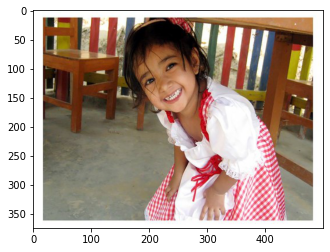

In [ ]:
print_image(curr_folder + '/MyDrive/NN/Pictures/7999.jpg')

In [ ]:
print("VGG16:")
path_i = curr_folder + '/MyDrive/NN/Pictures/7983.jpg'
generate_and_print_captions(path_i, vgg16_extractor, vgg16_target_size, v_models, "vgg16")

In [ ]:
print("alt VGG16:")
generate_and_print_captions(curr_folder + '/MyDrive/NN/Pictures/1.jpg', vgg16_extractor, vgg16_target_size, v_2_models, "vgg16")

In [ ]:
print("Inception:")
generate_and_print_captions(curr_folder + '/MyDrive/NN/Pictures/7983.jpg', inception_extractor, inception_target_size, i_models, "inception")

In [ ]:
print("alt Inception:")
generate_and_print_captions(curr_folder + '/MyDrive/NN/Pictures/7999.jpg', inception_extractor, inception_target_size, i_2_models, "inception")

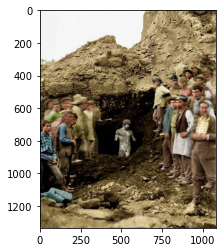

In [ ]:
print_image('D:/downloads/03.jpg')

In [ ]:
print("VGG16:")
generate_and_print_captions('D:/downloads/03.jpg', vgg16_extractor, vgg16_target_size, v_models, "vgg16")

VGG16:
0 startseq группа людей в костюмах и женщина на улице endseq
1 startseq группа людей в костюмах и оранжевых костюмах стоят на улице endseq
2 startseq группа людей в красных костюмах и белых рубашках стоят на пляже endseq
3 startseq группа людей в красных рубашках и красных рубашках стоят на пляже endseq
4 startseq группа людей стоит на пляже и смотрят на чтото endseq
5 startseq группа детей стоит на пляже endseq
6 startseq группа людей стоит на пляже endseq
7 startseq группа людей сидит на пляже и смотрит на чтото endseq
8 startseq группа людей сидит на шезлонгах и смотрит на чтото endseq
9 startseq группа девушекаборигенов в праздничных костюмах endseq
10 startseq группа людей стоит на пляже endseq
11 startseq группа людей собирается на открытом воздухе endseq
12 startseq группа людей стоит на пляже endseq
13 startseq группа людей стоит на улице и смотрит на чтото endseq
14 startseq группа детей позирует для фотографий на открытом воздухе endseq
15 startseq группа детей стоит н

In [ ]:
print("alt VGG16:")
generate_and_print_captions('D:/downloads/03.jpg', vgg16_extractor, vgg16_target_size, v_2_models, "vgg16")

alt VGG16:
0 startseq мужчина в в в в в в в в в в в в в в в в в в в в в
1 startseq группа людей в черном и людей в рубашке и в в рубашке в и людей в рубашке и людей в воздухе endseq
2 startseq группа людей в белых рубашках и белых шортах и синих синих шортах endseq
3 startseq группа людей в белых рубашках и белых рубашки и белых рубашки и белых рубашки и белых рубашки и белых рубашки и белых
4 startseq группа людей и детей сидят на пляже endseq
5 startseq группа людей в оранжевых жилетах стоят на улице endseq
6 startseq группа людей в оранжевых жилетах и зеленых шортах и зеленых брюках стоят на пляже endseq
7 startseq группа людей в костюмах и женщина в белой одежде стоят на улице endseq
8 startseq группа людей в тюрбанах и красных шортах стоят на земле endseq
9 startseq группа людей в тюрбанах и коричневых шортах стоят на улице endseq
10 startseq группа детей сидит на слонах и третье животные endseq
11 startseq группа детей сидит на пьедестале endseq
12 startseq группа детей сидящих н

In [ ]:
print("Inception:")
generate_and_print_captions('D:/downloads/03.jpg', inception_extractor, inception_target_size, i_models, "inception")

Inception:
0 startseq мужчина в черной рубашке и шляпе и шляпе и женщина в белом рубашке на улице endseq
1 startseq группа людей в белом и шляпе и рубашки в белом пальто и шляпе в воздухе endseq
2 startseq группа людей стоит на земле с видом на заднем плане endseq
3 startseq группа людей стоит на вершине большого здания endseq
4 startseq группа людей стоит на вершине холма с видом на заднем плане endseq
5 startseq группа людей стоит на вершине горы endseq
6 startseq группа людей сидит на каньоне endseq
7 startseq группа людей сидит на каньоне endseq
8 startseq группа людей идет по тропинке в пустыне endseq
9 startseq группа людей идет по тропинке в лесу endseq
10 startseq группа людей идет по тропинке в лесу endseq
11 startseq группа людей идет по полю с сетями в руках endseq
12 startseq группа людей идет по тропинке в лесу endseq
13 startseq группа людей идет по полю с сетями в руках endseq
14 startseq группа людей идет по полю endseq
15 startseq группа людей идет по травянистому полю

In [ ]:
print("alt Inception:")
generate_and_print_captions('D:/downloads/03.jpg', inception_extractor, inception_target_size, i_2_models, "inception")

alt Inception:
0 startseq мужчина в рубашке и в рубашке и черном рубашке и в рубашке и черном рубашке и в рубашке и черном рубашке и
1 startseq группа людей в белых рубашках и белых рубашках стоят на улице endseq
2 startseq группа людей в оранжевых жилетах endseq
3 startseq группа людей в оранжевых жилетах стоят на улице endseq
4 startseq группа людей идущих по улице endseq
5 startseq группа людей идущих по улице endseq
6 startseq группа людей идущих по тропинке endseq
7 startseq группа людей идущих по железнодорожному путям endseq
8 startseq группа людей осматривающихся в линию на каньоне endseq
9 startseq группа людей осматривающихся в линию к каньоне endseq
10 startseq группа людей сидит на склоне горы endseq
11 startseq группа людей осматривающихся в затененной затененной камнем области endseq
12 startseq группа людей идущих по железнодорожному пути endseq
13 startseq группа людей идет по полю с сетями в руках endseq
14 startseq группа людей идет по полю endseq
15 startseq группа л